In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import ks_2samp
from scipy.stats import gaussian_kde
import my_functions_notebook as mf
import my_functions_for_plots as mf_plots

In [2]:
#In case we need to reload  functions

#import importlib
#importlib.reload(mf)
#importlib.reload(mf_plots)

In [3]:
## VISp CELLS! 60 SESSIONS
## my_area = 'VISp'

In [4]:
#LIST OF VARIABLES AS IN THE DATA FORMAT
#mean_NC_ACTIVE, mean_SC_ACTIVE, mean_NC_PASSIVE, mean_SC_PASSIVE, is_orthogonal_matrix,  determinant_rot_matrix, pearson_ACTIVE, pearson_PASSIVE, p_value_ACTIVE, p_value_PASSIVE

In [5]:
# Step 1: Import data from the text file into NumPy arrays
data = np.loadtxt("../local_code/signal_noise_corr_comparison_VISp.txt", delimiter=' ')  # Use the appropriate delimiter

mean_NC_ATIVE = data[:,0]
mean_NC_PASSIVE = data[:,2]

mean_SC_ATIVE = data[:,1]
mean_SC_PASSIVE = data[:,3]

signal_noise_corr_ACTIVE = data[:,6]
signal_noise_corr_PASSIVE = data[:,7]

p_values_ACTIVE = data[:,8]
p_values_PASSIVE = data[:,9]

is_orthogonal_matrix = data[:,4]
determinant_rotation_matrix = data[:,5]

KS Statistic: 0.2308
KS Test p-value (permutations): 0.4865
Significance Level (alpha): 0.0500
There is no significant difference between the two datasets.


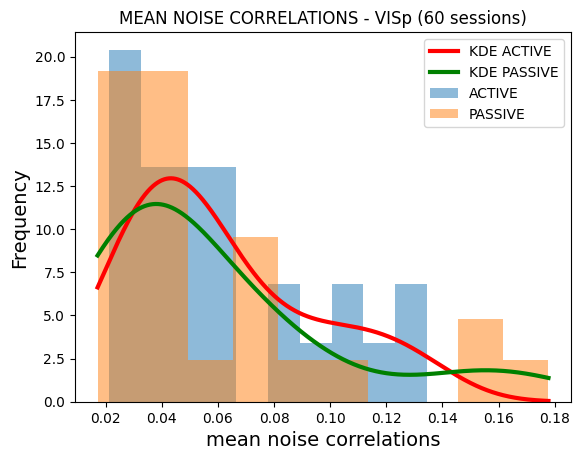

In [6]:
#MEAN NOISE CORRELATIONS (MAGNITUDE): COMPARISON
xlabel_NC = 'mean noise correlations'
title_NC = 'MEAN NOISE CORRELATIONS - VISp (60 sessions)'
n_bins_NC = 10
mf_plots.plot_and_test_histograms(mean_NC_ATIVE[np.isclose(determinant_rotation_matrix,1.)], mean_NC_PASSIVE[np.isclose(determinant_rotation_matrix,1.)], n_bins_NC, 1000, 0.05, xlabel_NC, title_NC)

In [7]:
np.sum(np.isclose(determinant_rotation_matrix,1.))

26

In [8]:
determinant_rotation_matrix

array([ 1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
       -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1., -1.,  1.])

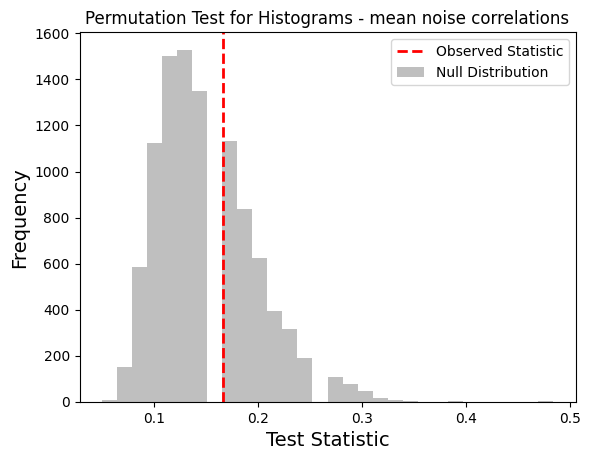

p-value: 0.3759


(0.3758624137586241, False)

In [9]:
mf_plots.permutation_test_histograms(mean_NC_ATIVE, mean_NC_PASSIVE, 10000, 0.05, 'Permutation Test for Histograms - mean noise correlations')

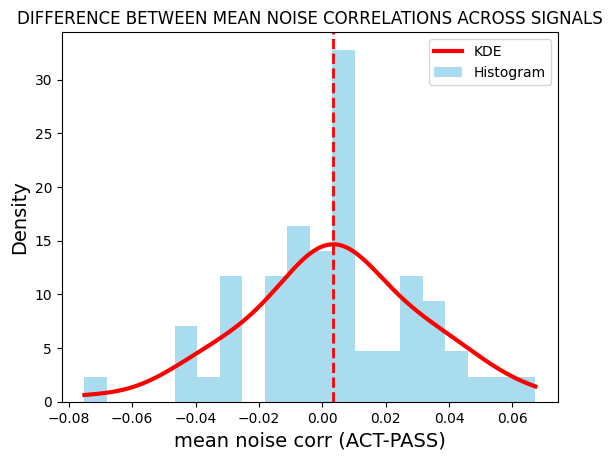

In [10]:
#PAIRWISE TO CONFIRM RESULT
NC_diff = mean_NC_ATIVE - mean_NC_PASSIVE

mf_plots.fit_and_plot_histogram(NC_diff, xlabel='mean noise corr (ACT-PASS)', title='DIFFERENCE BETWEEN MEAN NOISE CORRELATIONS ACROSS SIGNALS', num_bins=20)

KS Statistic: 0.2000
KS Test p-value (permutations): 0.2008
Significance Level (alpha): 0.0500
There is no significant difference between the two datasets.


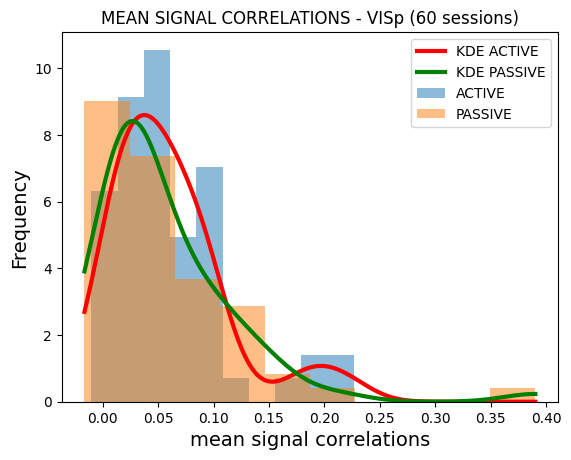

In [11]:
#SIGNAL CORRELATIONS

xlabel_SC = 'mean signal correlations'
title_SC = 'MEAN SIGNAL CORRELATIONS - VISp (60 sessions)'
n_bins_SC = 10
mf_plots.plot_and_test_histograms(mean_SC_ATIVE, mean_SC_PASSIVE, n_bins_SC, 1000, 0.05, xlabel_SC, title_SC, False, True, 'Mean_signal_corr_VISp_60_sess.png')

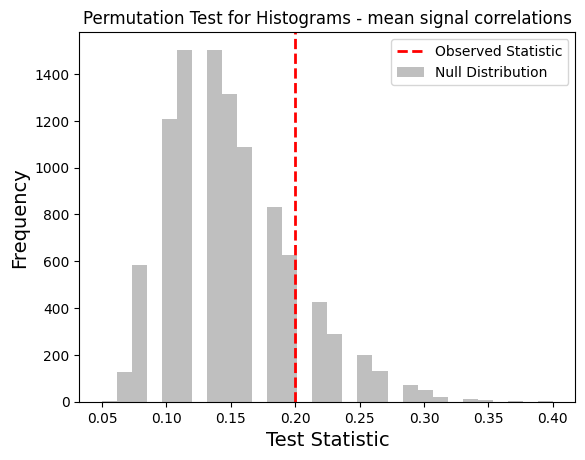

p-value: 0.1838


(0.1837816218378162, False)

In [12]:
mf_plots.permutation_test_histograms(mean_SC_ATIVE, mean_SC_PASSIVE, 10000, 0.05, 'Permutation Test for Histograms - mean signal correlations')

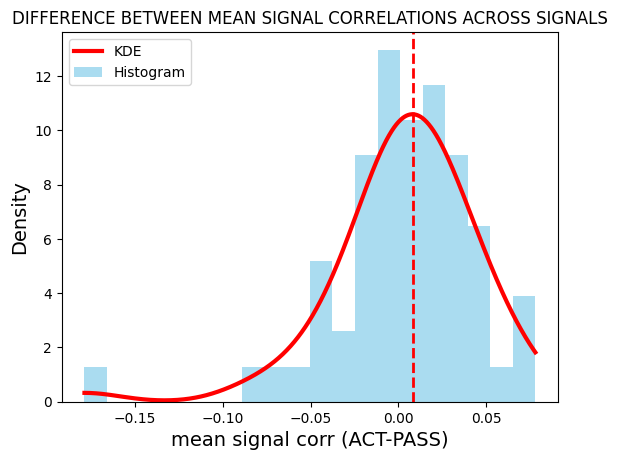

In [13]:
#PAIRWISE TO CONFIRM RESULT
SC_diff = mean_SC_ATIVE - mean_SC_PASSIVE

mf_plots.fit_and_plot_histogram(SC_diff, xlabel='mean signal corr (ACT-PASS)', title='DIFFERENCE BETWEEN MEAN SIGNAL CORRELATIONS ACROSS SIGNALS', num_bins=20)

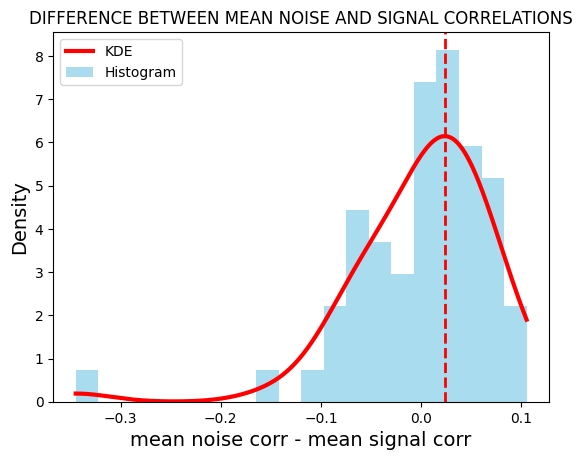

In [14]:
#DIFFERENCE BETWEEN MEAN NOISE CORRELATIONS AND SIGNAL CORRELATIONS (IN EACH SESSION, BETWEEN ACTIVE AND PASSIVE)
NC_SC_difference = mean_NC_ATIVE - mean_SC_PASSIVE
mf_plots.fit_and_plot_histogram(NC_SC_difference, xlabel='mean noise corr - mean signal corr', title='DIFFERENCE BETWEEN MEAN NOISE AND SIGNAL CORRELATIONS', num_bins=20)

In [15]:
print('no clear modulation of noise and signal correlations strength')

no clear modulation of noise and signal correlations strength


In [16]:
# CORRELATIONS BETWEEN NOISE AND SIGNAL CORRELATIONS

KS Statistic: 0.3833
KS Test p-value (permutations): 0.0010
Significance Level (alpha): 0.0500
The two datasets are statistically different.


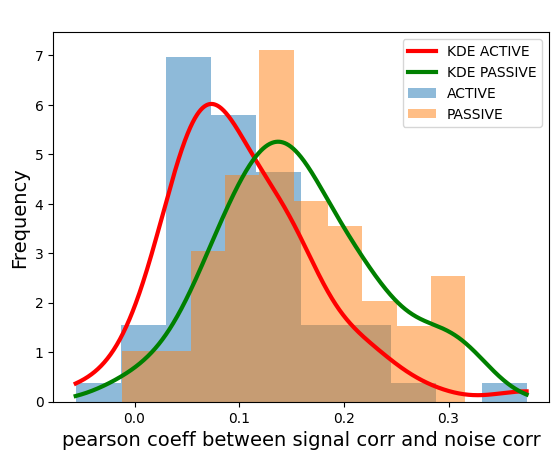

In [17]:
xlabel_PEARS = 'pearson coeff between signal corr and noise corr'
title_PEARS = 'CORRELATION BETWEEN SIGNAL AND NOISE - VISp (60 sessions)'
n_bins_PEARS = 10
plot = mf_plots.plot_and_test_histograms(signal_noise_corr_ACTIVE, signal_noise_corr_PASSIVE, n_bins_PEARS, 1000, 0.05, xlabel_PEARS, ' ', False, True, filename = 'Noise_Signal_correlations_VISp_60_sessions.png')

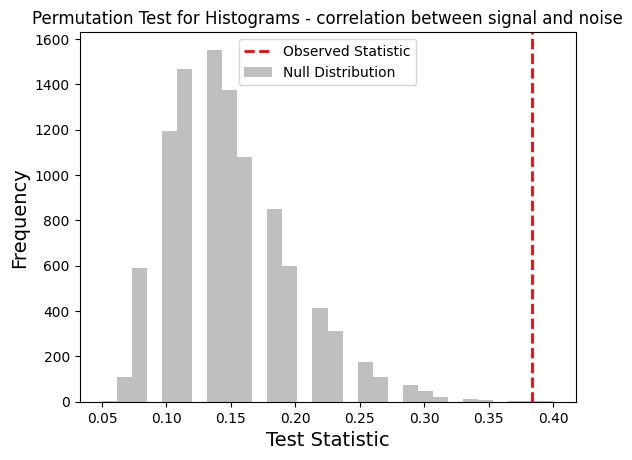

p-value: 0.0004


In [18]:
plot = mf_plots.permutation_test_histograms(signal_noise_corr_ACTIVE, signal_noise_corr_PASSIVE, 10000, 0.05, 'Permutation Test for Histograms - correlation between signal and noise')

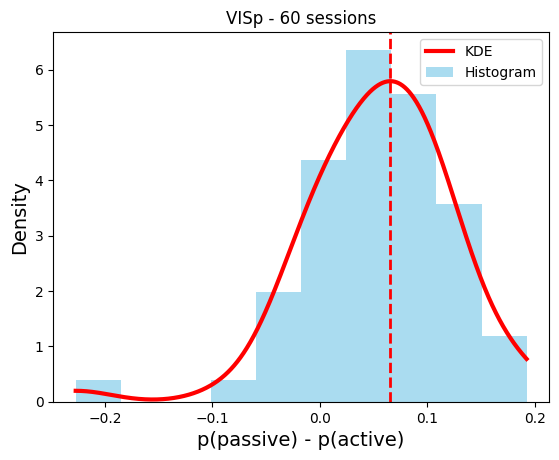

In [19]:
#DIFFERENCE BETWEEN PEARSON COEFFICIENTS (IN EACH SESSION, BETWEEN ACTIVE AND PASSIVE)
PEARS_difference = signal_noise_corr_PASSIVE - signal_noise_corr_ACTIVE
mf_plots.fit_and_plot_histogram(PEARS_difference, 'p(passive) - p(active)', 'VISp - 60 sessions', 10, 0.5, True, 'Noise_Signal_correlations_DIFFERENCE_VISp_60_sessions.png')

In [20]:
PEARS_difference.argmax()

31

In [21]:
signal_noise_corr_ACTIVE[31]- signal_noise_corr_PASSIVE[31]

-0.19230607957067983

In [22]:
p_values_ACTIVE[31]

0.00018794970596125983